<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/Estadistica%20no%20parametrica/AnalisisDistribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de distribuciones

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro


df=pd.read_csv('https://raw.githubusercontent.com/cccg8105/curso-no-parametrica/master/2.%20Distribuciones%20y%20varianzas%20de%20grupos/2.2%20Analizando%20distribuciones%20en%20Python/notasmatesingles.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.head()

,Matematicas,Ingles
0,80.0,77.0
1,78.0,67.0
2,90.0,77.0
3,70.0,76.0
4,55.0,72.0


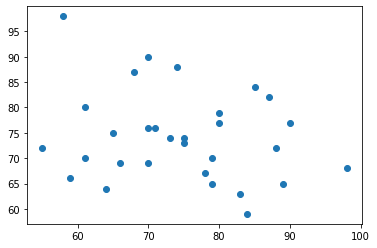

In [3]:
plt.scatter(df['Matematicas'], df['Ingles']);

## Modelo de regresión lineal

In [6]:
model = LinearRegression()
X = pd.DataFrame(df['Matematicas'])
y = pd.DataFrame(df['Ingles'])
model.fit(X, y)

print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(X)

intercept: [87.5755888]
slope: [[-0.17819582]]


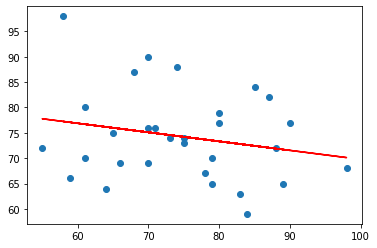

In [7]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [9]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    predictions_df=pd.DataFrame(predictions,columns=['Predictions'])
    df_results = pd.DataFrame({'Actual': y['Ingles'], 'Predicted': predictions_df['Predictions']})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [11]:
df_results = calculate_residuals(model, X, y)
df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    
    print('Assumption: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed', '\n')
    else:
        print('Residuals are normally distributed', '\n')
    
    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test = shapiro(df_results['Residuals'])
    shapiro_test_stat=shapiro_test[0]
    shapiro_test_pvalue=shapiro_test[1]
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
    # Reporting the normality of the residuals
    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.2711452095714222
Residuals are normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.282282292842865
Residuals are normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


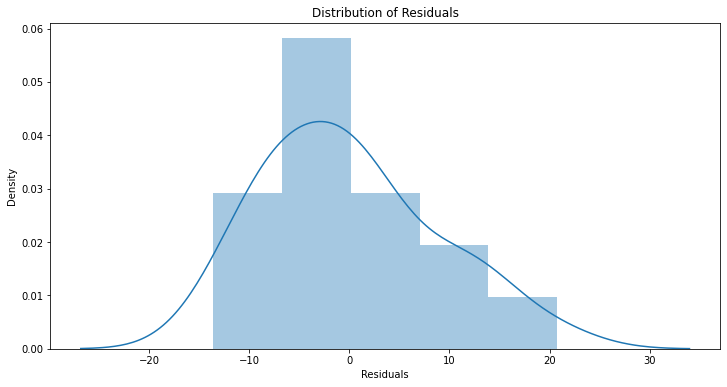


Assumption satisfied


In [12]:
normal_errors_assumption(model, X, y)